# K-Nearest Neighbour

In [1]:
import os
import struct
from array import array

In [2]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [4]:

class MNIST(object):
    def __init__(self, path='.'):
        self.path = path

        self.test_img_file = 't10k-images-idx3-ubyte'
        self.test_lbl_file = 't10k-labels-idx1-ubyte'

        self.train_img_file = 'train-images-idx3-ubyte'
        self.train_lbl_file = 'train-labels-idx1-ubyte'



    def load_testing(self):
        ims, labels = self.load(os.path.join(self.path, self.test_img_file),
                                os.path.join(self.path, self.test_lbl_file))

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    def load_training(self):
        ims, labels = self.load(os.path.join(self.path, self.train_img_file),
                                os.path.join(self.path, self.train_lbl_file))

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    
    def load(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049,'
                                 'got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051,'
                                 'got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels



In [5]:
# K Nearest Neighbors

old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file

In [6]:

#Loading MNIST Data
# data = MNIST('./python-mnist/data/')

data = MNIST('./MNIST-Dataset/python-mnist/')

In [7]:
#Loading Training Data
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

#Loading Testing Data
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

In [8]:
#Features
X = train_img
#Labels
y = train_labels
#Preparing Classifier Training and Validation Data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

In [9]:
#KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10
#Pickling the Classifier for Future Use
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)
clf.fit(X_train,y_train)

with open('MNIST_KNN.pickle','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_KNN.pickle','rb')
clf = pickle.load(pickle_in)

In [10]:
#Calculating Accuracy of trained Classifier
confidence = clf.score(X_test,y_test)

#Making Predictions on Validation Data
y_pred = clf.predict(X_test)

#Calculating Accuracy of Predictions
accuracy = accuracy_score(y_test, y_pred)

#Creating Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)


In [11]:
#KNN Trained Classifier Confidence: 
confidence

0.97283333333333333

In [12]:
#Predicted Values:
y_pred

array([6, 4, 8, ..., 7, 4, 5])

In [13]:
#Accuracy of Classifier on Validation Image Data:
accuracy

0.97283333333333333

In [14]:
#Confusion Matrix:
conf_mat

array([[575,   1,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 646,   2,   0,   0,   0,   0,   3,   0,   1],
       [  1,   8, 575,   2,   1,   1,   0,  10,   0,   1],
       [  0,   2,   4, 600,   0,   3,   0,   2,   5,   1],
       [  0,   4,   0,   0, 564,   0,   2,   2,   0,  12],
       [  2,   0,   0,   5,   2, 532,   7,   1,   1,   2],
       [  2,   0,   0,   0,   0,   0, 583,   0,   0,   0],
       [  0,  10,   4,   0,   1,   0,   0, 624,   0,   6],
       [  3,   6,   0,   8,   3,   8,   2,   0, 544,   5],
       [  2,   0,   0,   5,   3,   0,   0,   5,   1, 594]])

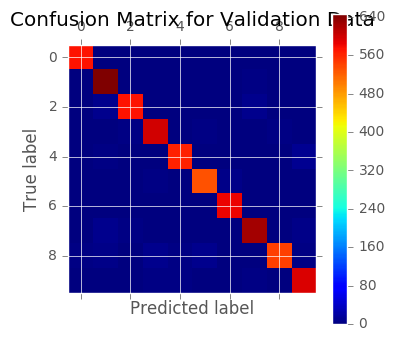

In [15]:
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
#Making Predictions on Test Input Images
test_labels_pred = clf.predict(test_img)

#Calculating Accuracy of Trained Classifier on Test Data
acc = accuracy_score(test_labels,test_labels_pred)

#Creating Confusion Matrix for Test Data
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

In [45]:
#Predicted Labels for Test Images: 
test_labels_pred

array([7, 2, 1, ..., 4, 5, 6])

In [46]:
#Accuracy of Classifier on Test Images: 
acc

0.96789999999999998

In [47]:
#Confusion Matrix for Test Data:
conf_mat_test

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    0,    0,    0,    1],
       [  12,    7,  989,    2,    1,    0,    1,   17,    3,    0],
       [   0,    3,    1,  973,    1,   15,    1,    8,    4,    4],
       [   1,    7,    0,    0,  947,    0,    4,    2,    1,   20],
       [   6,    0,    0,   11,    2,  861,    5,    1,    2,    4],
       [   6,    2,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   21,    4,    0,    3,    0,    0,  990,    0,   10],
       [   7,    4,    6,   15,    8,   13,    5,    5,  908,    3],
       [   5,    7,    3,    9,    6,    3,    1,   12,    2,  961]])

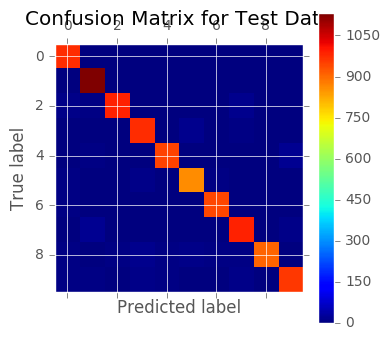

In [48]:
# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

sys.stdout = old_stdout
log_file.close()

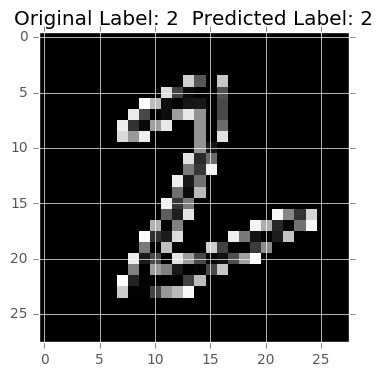

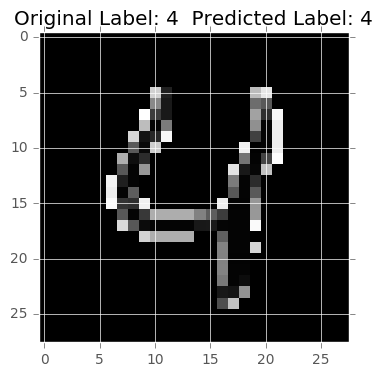

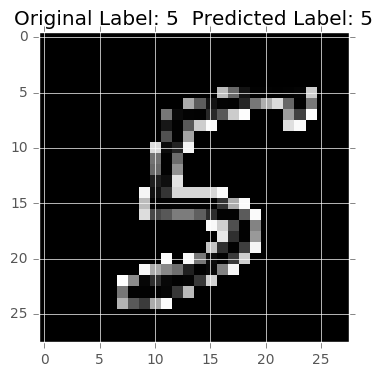

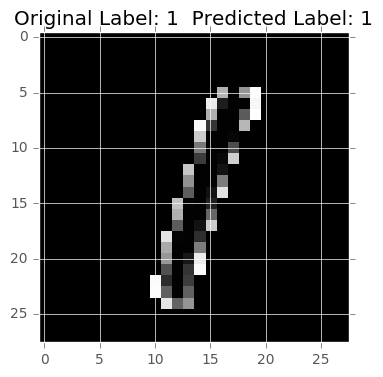

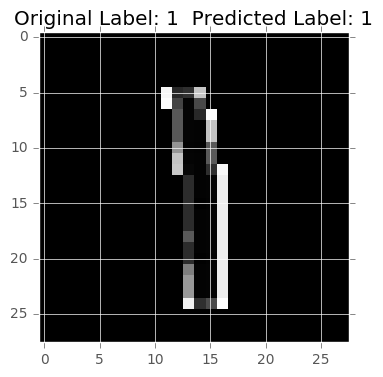

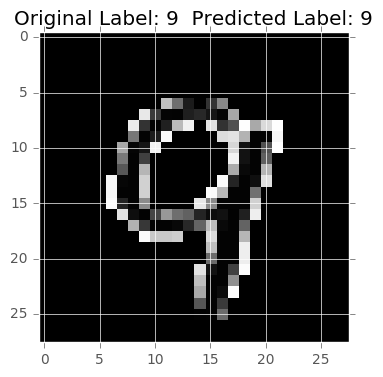

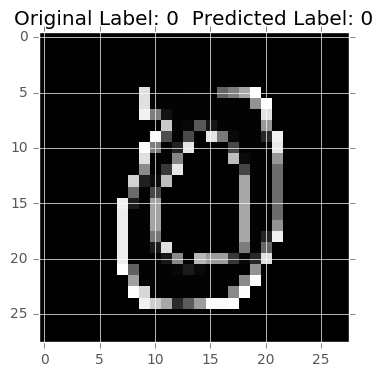

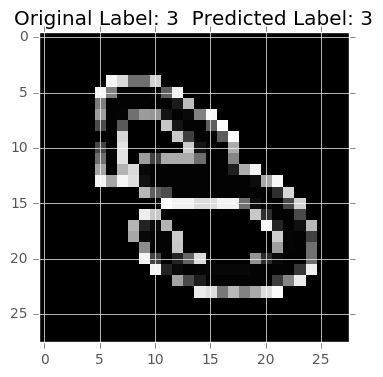

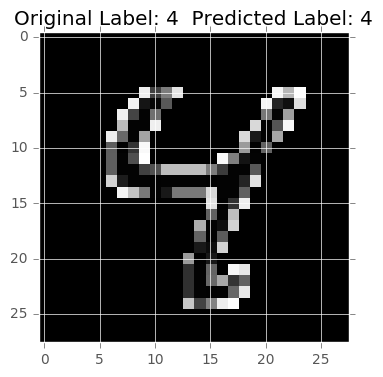

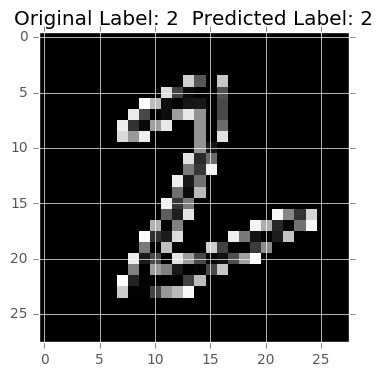

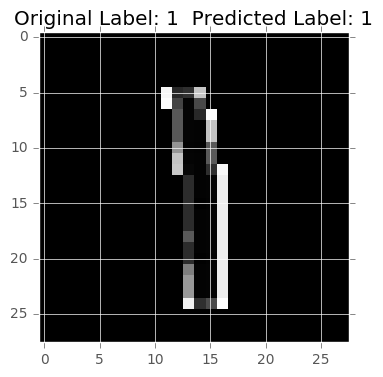

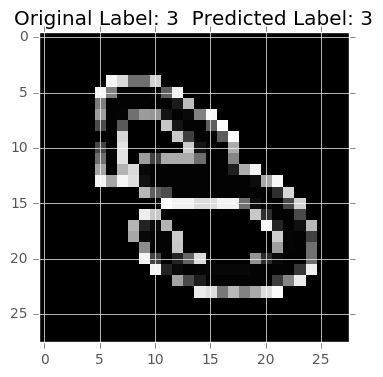

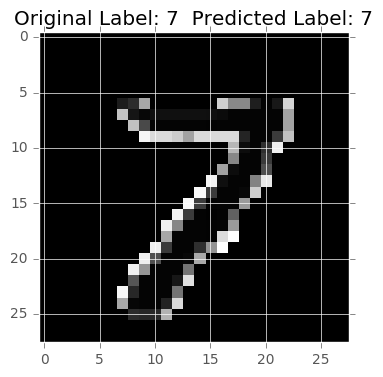

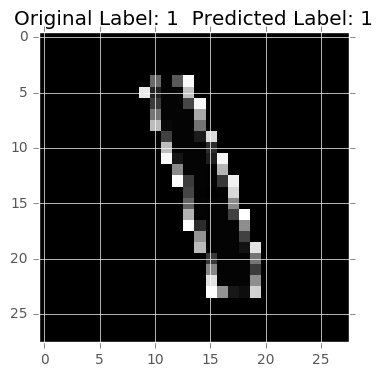

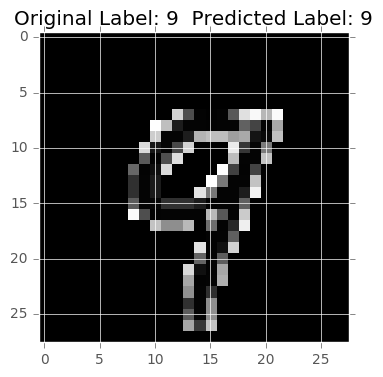

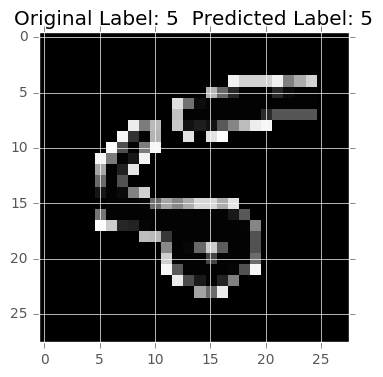

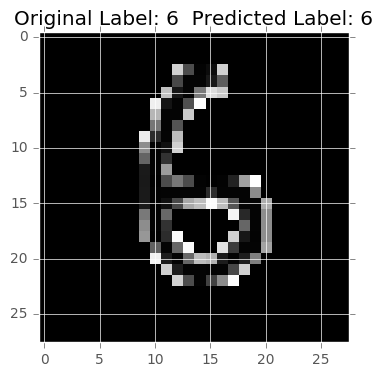

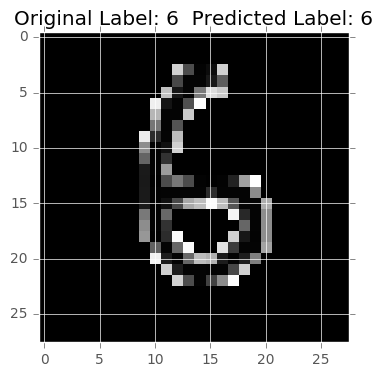

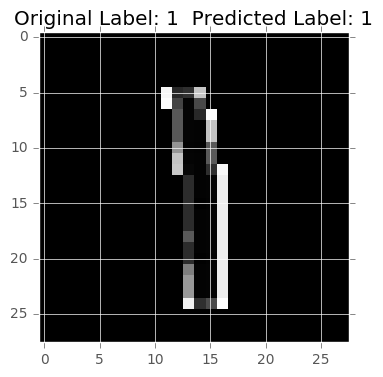

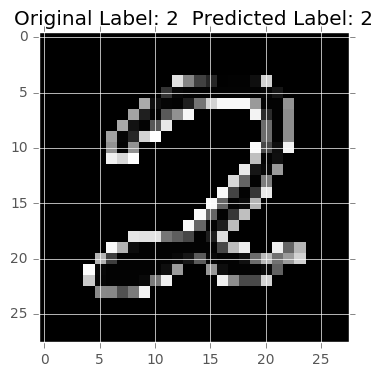

In [49]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,50,20)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

